In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.compose import make_column_transformer, make_column_selector

In [21]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Cases\human-resources-analytics\HR_comma_sep.csv")
X = df.drop("left",axis=1)
ohc = OneHotEncoder(sparse_output=False,drop="first")
ct = make_column_transformer((ohc,make_column_selector(dtype_include = object)),
                             ("passthrough",make_column_selector(dtype_include = ["int64","float64"])),
                             verbose_feature_names_out=False).set_output(transform='pandas')
X = ct.fit_transform(X)
y = df["left"]

In [18]:
## Grid search for parameters max_deapth, min samples split, mean samples leaf

In [12]:
kfold = StratifiedKFold(n_splits =5,shuffle = True, random_state = 24)
dtc = DecisionTreeClassifier(random_state=24)
params= {"max_depth":[None,2,4,6],"min_samples_split": np.arange(2,10,5),"min_samples_leaf":np.arange(1,10,5)}
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring="neg_log_loss")
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}
-0.10424725773694762


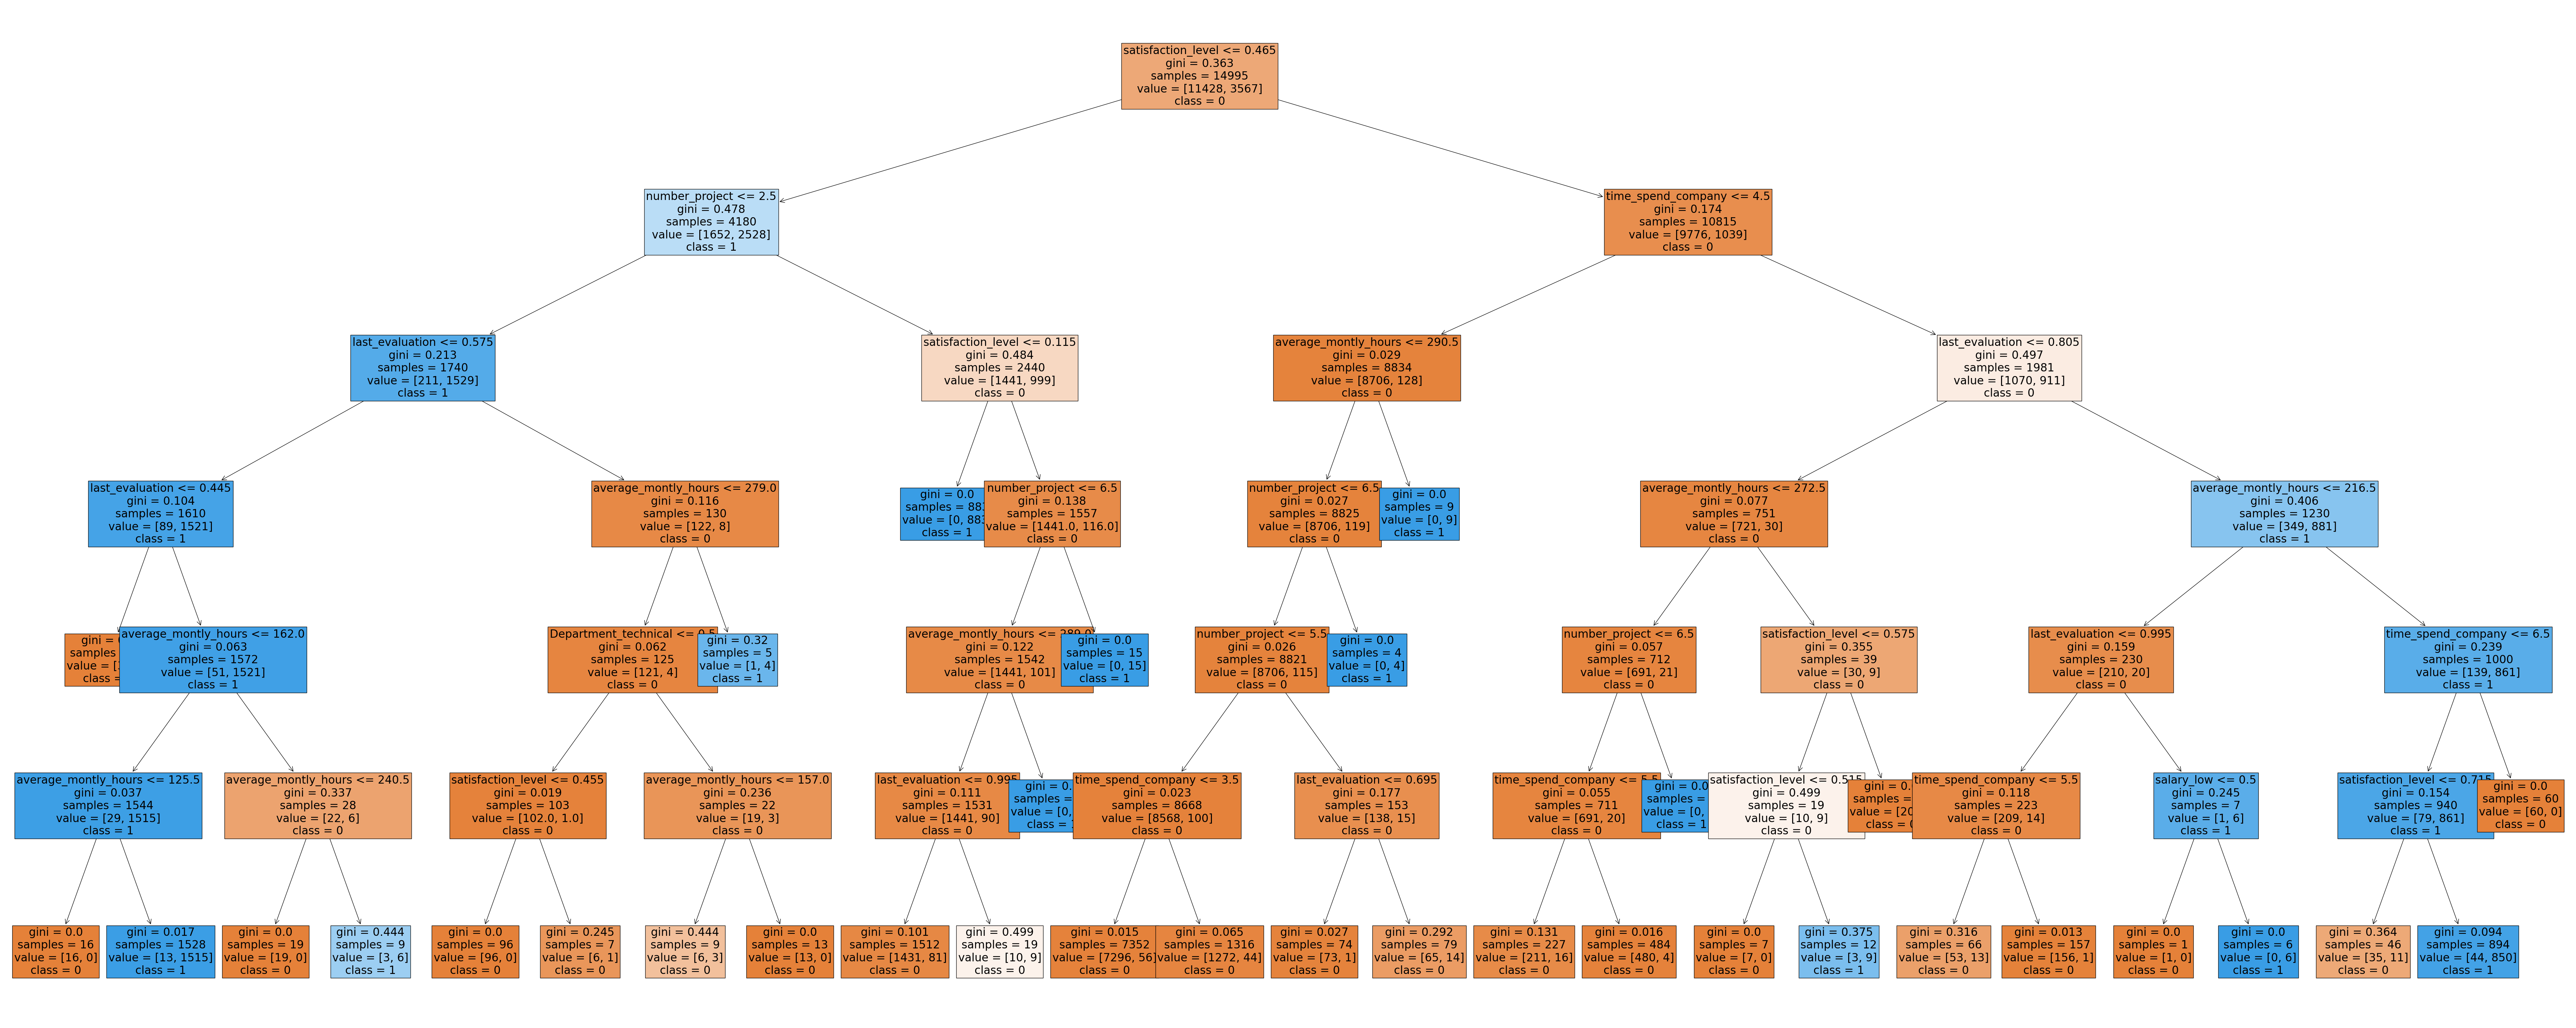

In [13]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(100,40))
plot_tree(best_tree,feature_names=list(X.columns), class_names=['0','1'], filled=True,fontsize=24)
plt.show() 

In [16]:
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":best_tree.feature_importances_})

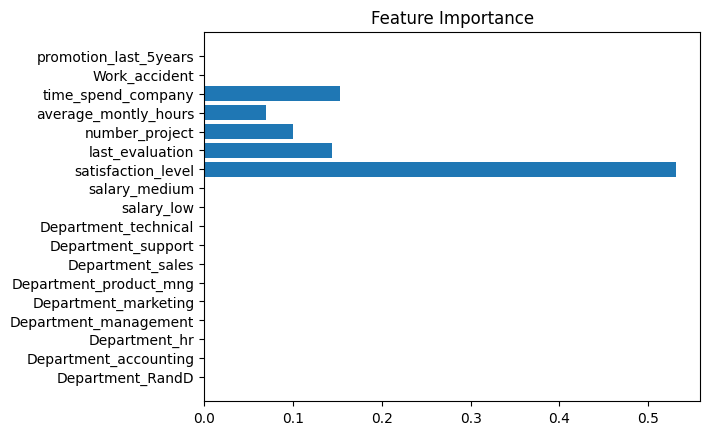

In [17]:
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance")
plt.show()

In [22]:
test = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Cases\human-resources-analytics\tst_hr.csv")
X_test = ct.transform(test)

In [23]:
X_test.columns

Index(['Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium',
       'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')

In [20]:
X.columns

Index(['Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium',
       'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')

In [24]:
best_tree.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)